## Introducción a la ciencia de las redes: _Actividad entregable 4_

#### _Briones Andrade Joshua_


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import networkx as nx

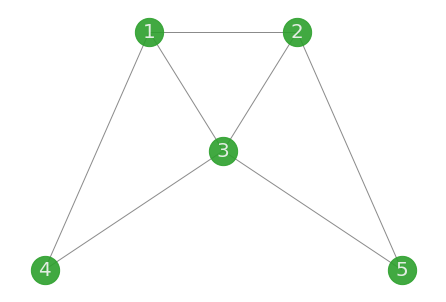

In [184]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size":20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,5+1))
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,5),(3,4),(3,5)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, seed=31137942) 
nx.draw_spectral(G, with_labels=True, **options)

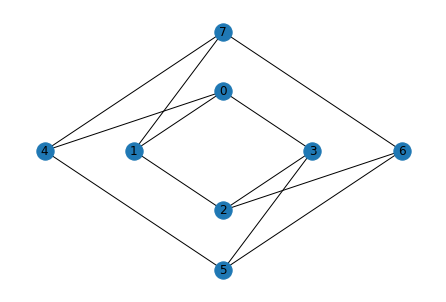

In [133]:
G = nx.cubical_graph()
pos = nx.spring_layout(G, seed=3113794)

nx.draw_shell(G, nlist=[range(4), range(4,8)], with_labels=True)


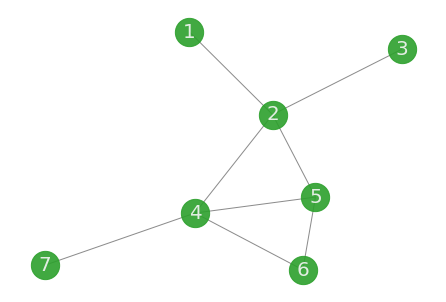

In [207]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size": 20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,7+1))
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,6)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, k=1, iterations=30000, threshold=0.000001, seed=36129312) 
nx.draw(G, pos, with_labels=True, **options)

In [244]:
def grado_prom(G):
    N = len(G); k = 0
    for i in range(1, N +1):
        k += G.degree[i]
    return k/N

print("-------- Grado [k] ---------","\n")
print("Promedio:", grado_prom(G))


-------- Grado [k] --------- 

Promedio: 2.2857142857142856


In [240]:
def clustering_prom(G):
    N = len(G); k = 0
    for i in range(1, N+1):
        k += nx.clustering(G, i)
    return k/N

print("---Clustering coefficient---","\n")
print("Promedio:", clustering_prom(G))
print("Nodo 5:  ", nx.clustering(G, 5))

---Clustering coefficient--- 

Promedio: 0.3095238095238095
Nodo 5:   0.6666666666666666


In [281]:
def betweenness_prom(G):
    N = len(G); s = 0
    B_dict = nx.betweenness_centrality(G, k=N)
    for key in B_dict:
        s += B_dict[key]
    return s/N

print("---Betweenness centrality---","\n")
print("Promedio:", betweenness_prom(G))
print("Nodo 2:  ", nx.betweenness_centrality(G, k=7)[2])

---Betweenness centrality--- 

Promedio: 0.1619047619047619
Nodo 2:   0.6


In [303]:
def shortest_path_length(G):
    N = len(G); s = 0
    p = dict(nx.shortest_path_length(G))
    for i in p:
        for j in p[i]:
            s += p[i][j]
    return 2*s/(N*(N-1))

print("--- Shortest path length ---","\n")
print("Promedio:", shortest_path_length(G))
print("3 -> 7:  ", nx.shortest_path_length(G, source=3, target=7))

--- Shortest path length --- 

Promedio: 3.619047619047619
3 -> 7:   3


In [315]:
def closeness_prom(G):
    N = len(G); s = 0
    p = nx.closeness_centrality(G)
    for key in p:
        s += p[key]
    return s/N

print("--- Closeness centrality ---","\n")
print("Promedio:", closeness_prom(G))
print("Nodo 5:  ", nx.closeness_centrality(G, u=5))

--- Closeness centrality --- 

Promedio: 0.5787545787545787
Nodo 5:   0.6666666666666666


In [321]:
def eccentricity_prom(G):
    N = len(G); s = 0
    p = nx.eccentricity(G, v=None)
    for key in p:
        s += p[key]
    return s/N

print("------- Eccentricity -------","\n")
print("Promedio:", eccentricity_prom(G))
# print("Nodo 4:  ", nx.nx.eccentricity(G, v=4))

------- Eccentricity ------- 

Promedio: 2.5714285714285716


In [340]:
print("++ Diametro de la red, d =",nx.diameter(G), "++")

++ Diametro de la red, d = 3 ++
